In [94]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [95]:
# Load the Dataset
email_data = pd.read_csv('email.csv')

In [96]:
# Print the Dataset
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [97]:
# Display the concise summary
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [98]:
# Display the first five rows
email_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
# Display the shape of the dataset
email_data.shape

(5572, 2)

In [100]:
# Check the null values
email_data.isnull().sum()

,0
Category,0
Message,0


In [101]:
# Check the duplicated values
email_data.duplicated().sum()

415

In [102]:
# Drop the duplicated rows
email_data.drop_duplicates(inplace=True)

In [103]:
# Check there is duplicate left or not
email_data.duplicated().sum()

0

In [104]:
# Check the shape of the data after drop duplicates
email_data.shape

(5157, 2)

In [105]:
# Encode the Category (Ham ==0 , Spam ==1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
email_data['Category'] = label_encoder.fit_transform(email_data['Category'])

In [154]:
# Count the occurrences of value in the 'Category' column
email_data['Category'].value_counts()

,count
Category,
0,4516
1,641


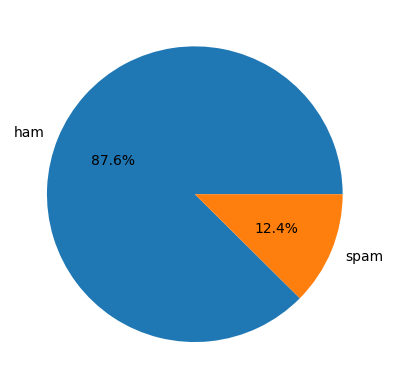

In [107]:
# Pie chart to visualize the category of ham and spam
plt.pie(email_data['Category'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [108]:
# Import the libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
# Create a new column 'characters' to store the length of character of each message.
email_data['characters']=email_data['Message'].apply(len)

In [110]:
# Create a new column 'num_words' to store the length of words of each message.
email_data['num_words'] = email_data['Message'].apply(lambda x:len (nltk.word_tokenize(x)))

In [111]:
# Create a new column 'num_sentences' to store the length of sentences of each message.
email_data['num_sentence'] = email_data['Message'].apply(lambda x:len (nltk.sent_tokenize(x)))

In [112]:
# Display the dataset
email_data

,Category,Message,characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [113]:
# Descriptive statistics for the 'characters', 'num_words', and 'num_sentence'
email_data[['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
# Descriptive Statistics of HAM
email_data[email_data['Category']==0] [['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [116]:
## Descriptive Statistics of SPAM
email_data[email_data['Category']==1] [['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [117]:
import seaborn as sns


<Axes: xlabel='characters', ylabel='Count'>

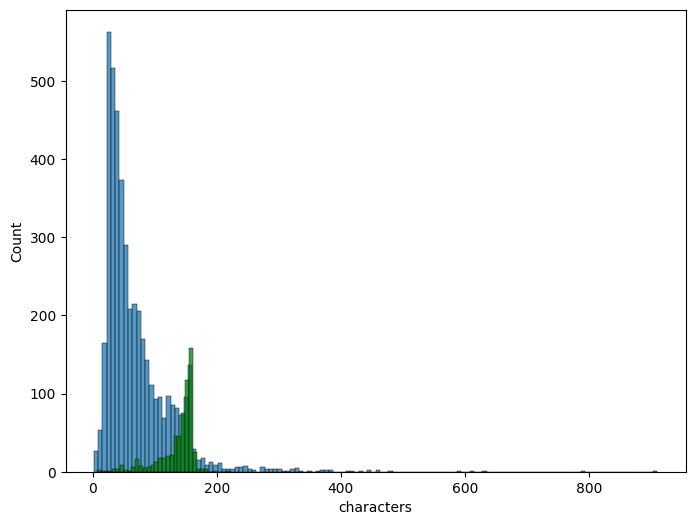

In [118]:
plt.figure(figsize=(8,6))
# Plot histogram for 'characters' in emails classified as 'ham' (Category == 0)
sns.histplot(email_data[email_data['Category']==0]['characters'])
# Plot histogram for 'characters' in emails classified as 'spam' (Category == 1)
sns.histplot(email_data[email_data['Category']==1]['characters'],color = 'green')

<Axes: xlabel='num_words', ylabel='Count'>

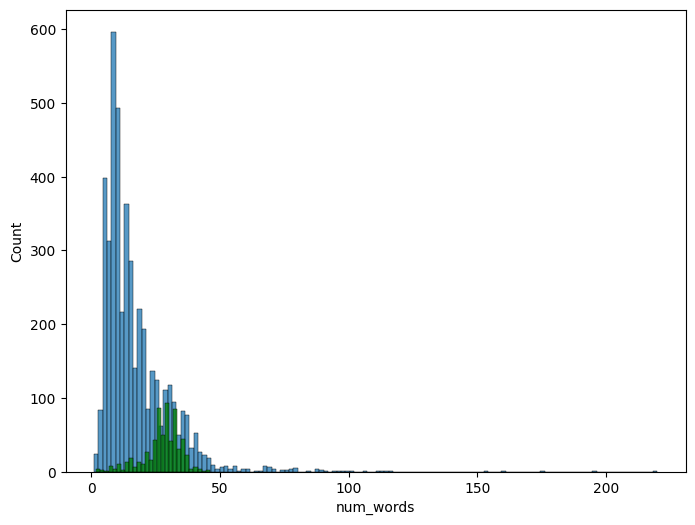

In [119]:
plt.figure(figsize=(8,6))
# Plot histogram for 'words' in emails classified as 'ham' (Category == 0)
sns.histplot(email_data[email_data['Category']==0]['num_words'])
# Plot histogram for 'words' in emails classified as 'ham' (Category == 1)
sns.histplot(email_data[email_data['Category']==1]['num_words'],color = 'green')

<Axes: xlabel='num_sentence', ylabel='Count'>

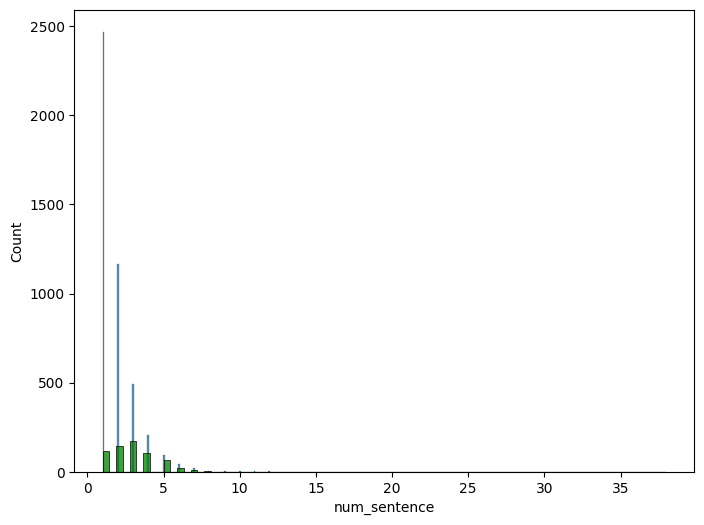

In [120]:
plt.figure(figsize=(8,6))
# Plot histogram for 'sentences ' in emails classified as 'ham' (Category == 0)
sns.histplot(email_data[email_data['Category']==0]['num_sentence'])
# Plot histogram for 'sentences' in emails classified as 'ham' (Category == 1)
sns.histplot(email_data[email_data['Category']==1]['num_sentence'],color = 'green')

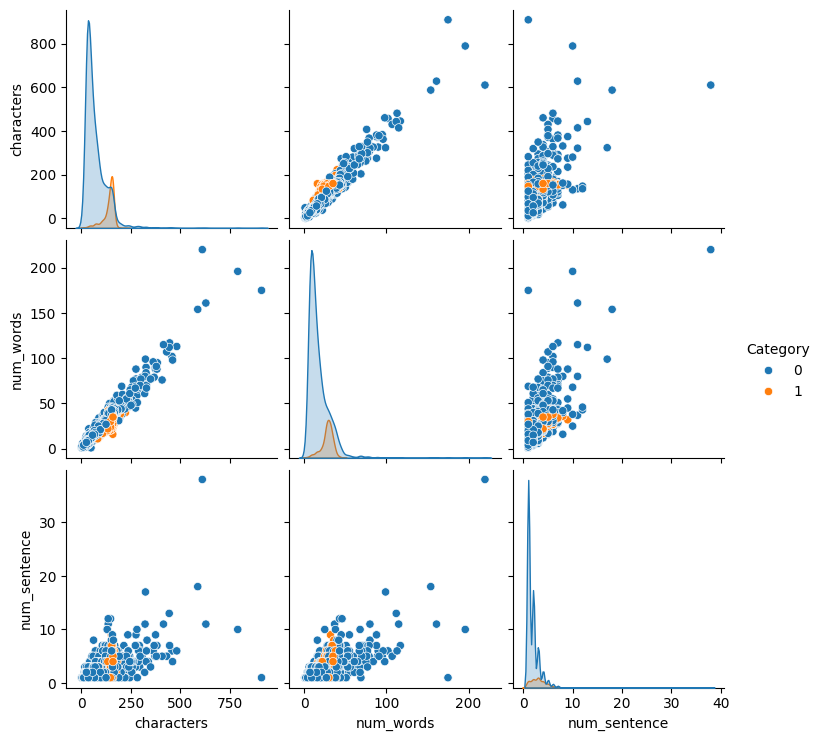

In [121]:
# pairplot to visualize the relationships between numerical features.
sns.pairplot(email_data,hue='Category')

In [122]:
non_numeric_columns = email_data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['Message'], dtype='object')


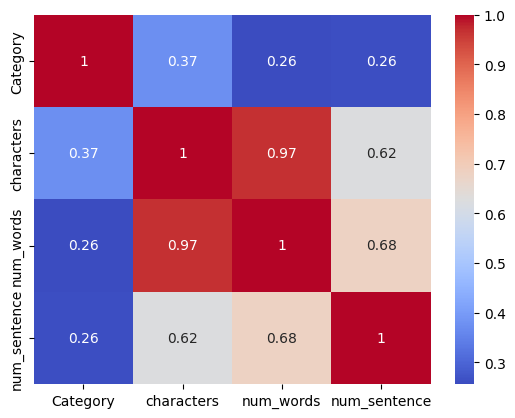

In [123]:
# Drop the non_numeric coloumns
email_dataset = email_data.drop(columns=non_numeric_columns)

# Calculate the correlation
email_dataset_corr = email_dataset.corr()
sns.heatmap(email_dataset_corr, annot=True, cmap='coolwarm')
plt.show()



In [125]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def preprocess_text(Message):
    # Convert the message in to lower case
    Message = Message.lower()
    # Tokenizing the text
    tokens = word_tokenize(Message)

    # set the stopwords
    stop_words = set(stopwords.words('english'))

    # Remove the Punctuation and alpha-numeric tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Initialize Stemming
    stemmer = PorterStemmer()

    # Apply the Stemming apply
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)
email_data['Processed_Text'] = email_data['Message'].apply(preprocess_text)

print(email_data)


      Category                                            Message  characters  \
0            0  Go until jurong point, crazy.. Available only ...         111   
1            0                      Ok lar... Joking wif u oni...          29   
2            1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3            0  U dun say so early hor... U c already then say...          49   
4            0  Nah I don't think he goes to usf, he lives aro...          61   
...        ...                                                ...         ...   
5567         1  This is the 2nd time we have tried 2 contact u...         160   
5568         0               Will ü b going to esplanade fr home?          36   
5569         0  Pity, * was in mood for that. So...any other s...          57   
5570         0  The guy did some bitching but I acted like i'd...         125   
5571         0                         Rofl. Its true to its name          26   

      num_words  num_senten

In [126]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
# Generate the word cloud for 'ham' messages
ham_wc = wc.generate(email_data[email_data['Category']==0]['Processed_Text'].str.cat(sep=' '))


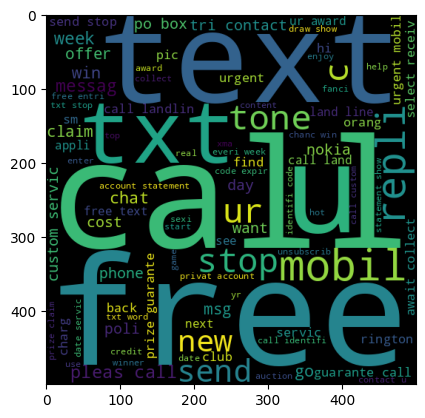

In [155]:
# Show the ham words
plt.imshow(ham_wc)

In [128]:
# Generate the word cloud for 'spam' messages
spam_wc = wc.generate(email_data[email_data['Category']==1]['Processed_Text'].str.cat(sep=' '))


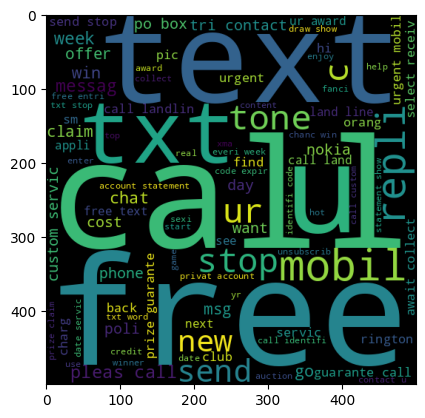

In [129]:
# Show the spam words
plt.imshow(spam_wc)

In [130]:
spam_words = []
# Iterate over each 'Processed_Text'where 'Category' is 1 (spam)
for text in email_data[email_data['Category']==1]['Processed_Text'].tolist():
  # Split each text entry into words
   for words in text.split():
    #Append in to spam_words list
    spam_words.append(words)


In [131]:
# print the spam words
spam_words

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'send',
 'cost',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'lccltd',
 'pobox',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'messag',
 'click',
 'http',
 'england',
 'v',
 'macedonia',
 'do

In [132]:
len(spam_words)

8041

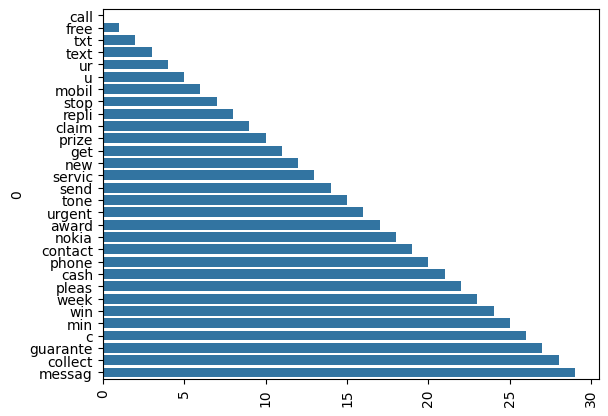

In [133]:
from collections import Counter
# Bar plot to visualize the most common 30 words of spam emails
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0])
# Rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()

In [134]:
ham_words = []
# Iterate over each 'Processed_Text'where 'Category' is 1 (spam)
for text in email_data[email_data['Category']==0]['Processed_Text'].tolist():
  # Split each text entry into words
   for words in text.split():
    #Append in to ham_words list
    ham_words.append(words)

In [135]:
len(ham_words)

35002

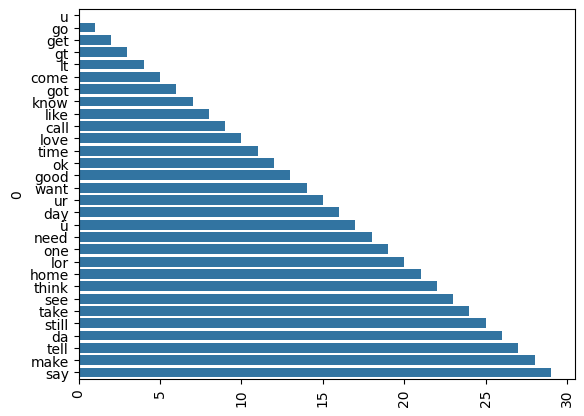

In [136]:
from collections import Counter
# Bar plot to visualize the most common 30 words of spam emails
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0])
# Rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
# Fit the vectorizer to the 'Processed_Text' column and transform the text data into TF-IDF features
x= v.fit_transform(email_data['Processed_Text']).toarray()


In [138]:
x.shape

(5157, 5906)

In [139]:
y = email_data['Category'].values

In [140]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [142]:
from sklearn.naive_bayes import MultinomialNB ,GaussianNB , BernoulliNB
# Initialize the MultinomialNB, GaussianNB, BernoulliNB
multi_nb = MultinomialNB()
gauss_nb = GaussianNB()
bern_nb = BernoulliNB()


In [143]:
from sklearn.metrics import accuracy_score,recall_score,f1_score, precision_score

In [144]:
# Train the Multinomial Naive Bayes classifier
multi_nb.fit(x_train,y_train)
# Predict the labels for the test data
y_prediction1 = multi_nb.predict(x_test)
# Evalute the Performance matrix
print("Accuracy of Multinomial Naive Bayes :" , accuracy_score(y_test,y_prediction1))
print("Recall Score of Multinomial Naive Bayes:", recall_score(y_test,y_prediction1))
print("F1 Score of Multinomial Naive Bayes:", f1_score(y_test,y_prediction1))
print("Precision of Multinomial Naive Bayes:",precision_score(y_test,y_prediction1))


Accuracy of Multinomial Naive Bayes : 0.9622093023255814
Recall Score of Multinomial Naive Bayes: 0.6929133858267716
F1 Score of Multinomial Naive Bayes: 0.8186046511627907
Precision of Multinomial Naive Bayes: 1.0


In [145]:
# Train the Guassiam Naive Bayes
gauss_nb.fit(x_train,y_train)
# Predict the labels for the test data
y_prediction2 = gauss_nb.predict(x_test)
# Evalute the Performance matrix
print("Accuracy of Guassian Naive Bayes :" , accuracy_score(y_test,y_prediction2))
print("Recall Score of Guassian Naive Bayes:", recall_score(y_test,y_prediction2))
print("F1 Score of Guassian Naive Bayes:", f1_score(y_test,y_prediction2))
print("Precision of Guassian Naive Bayes:",precision_score(y_test,y_prediction2))

Accuracy of Guassian Naive Bayes : 0.8653100775193798
Recall Score of Guassian Naive Bayes: 0.84251968503937
F1 Score of Guassian Naive Bayes: 0.6062322946175637
Precision of Guassian Naive Bayes: 0.47345132743362833


In [146]:
# Train the Bernoulli Naive Bayes
bern_nb.fit(x_train,y_train)
y_prediction3 = bern_nb.predict(x_test)
print("Accuracy of Bernoulli Naive Bayes :" , accuracy_score(y_test,y_prediction3))
print("Recall Score of Bernoulli Naive Bayes:", recall_score(y_test,y_prediction3))
print("F1 Score of Bernoulli Naive Bayes:", f1_score(y_test,y_prediction3))
print("Precision of Bernoulli Naive Bayes:",precision_score(y_test,y_prediction3))

Accuracy of Bernoulli Naive Bayes : 0.9728682170542635
Recall Score of Bernoulli Naive Bayes: 0.7952755905511811
F1 Score of Bernoulli Naive Bayes: 0.8782608695652175
Precision of Bernoulli Naive Bayes: 0.9805825242718447


In [147]:
from sklearn.svm import SVC


In [148]:
# Initialize the SVM
svm = SVC()

In [149]:
# Train the Svm
svm.fit(x_train,y_train)
# Predict the labels for the test data
y_prediction4= svm.predict(x_test)
# Evalute the Performance matrix
print("Accuracy of SVM :" , accuracy_score(y_test,y_prediction4))
print("Recall Score of SVM :", recall_score(y_test,y_prediction4))
print("F1 Score of SVM :", f1_score(y_test,y_prediction4))
print("Precision of SVM :",precision_score(y_test,y_prediction4))

Accuracy of SVM : 0.9689922480620154
Recall Score of SVM : 0.7480314960629921
F1 Score of SVM : 0.8558558558558559
Precision of SVM : 1.0


In [150]:
from tabulate import tabulate
models = {
    "Multinomial Naiva Bayes ": multi_nb,
    "Bernoulli Naive Bayes": bern_nb,
    "Gaussian Naive Bayes": gauss_nb,
    "Support Vector Machine": svm,
}
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall":[],
    "F1 Score":[]
}
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # Store the results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)


# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------+--------------------+--------------------+--------------------+--------------------+
|          Model          |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
| Multinomial Naiva Bayes | 0.9622093023255814 | 0.9637705705557745 | 0.9622093023255814 | 0.9591803237450791 |
|  Bernoulli Naive Bayes  | 0.9728682170542635 | 0.9730675102439534 | 0.9728682170542635 | 0.9716301710674932 |
|  Gaussian Naive Bayes   | 0.8653100775193798 | 0.9134416113388457 | 0.8653100775193798 | 0.8803005512232253 |
| Support Vector Machine  | 0.9689922480620154 | 0.9700512107749456 | 0.9689922480620154 | 0.9670267949943733 |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
